# Compute solution error for bump advection problem

This file computes the errors in the L1, L2 norms, and KL divergence for the DG, DFRG and DG +-limiter methods.
The results are saved in a CSV file.  The results are saved in a CSV file with a filename that includes the problem type, degree, polynomial order, time step size, and other parameters.

In [1]:
using LinearAlgebra
using CairoMakie
using FRG

Specify problem and method parameters to compute error for. Solution is extracted from saved .ser file.

In [2]:
type = "bump"
d = 2 # dimension
p = [ 1 , 1 ] # polynomial degree
n_q = [ 5 , 5 ] # number of quadrature points
T = 3.0 # final time

n_q_error = [ 5 , 5 ] # number of quadrature points for error estimation
n_t = 1 # compute error every n_t time steps

# number of cells to test
m_vec = 2 .^ [ 3 , 4 , 5 , 6 ]

# methods to compute error for
methods = [ "DG", "DG+limiter", "DFRG" ];

Specify reference solution for computing error.

In [3]:
p_ref = [ 1 , 1 ] # reference solution polynomial degree 
m_ref = [ 64 , 64 ] # number of cells in reference solution
n_q_ref = [ 5 , 5 ] # number of quadrature points in reference solution

is_exact = true; # use exact solution for reference solution

Compute errors for specified number of cells (m_vec) and methods.

In [4]:
error_time_norm_method_disc, time = FRG.compute_errors_given_disc_method(   type;
                                                                            d = d,
                                                                            p = p,
                                                                            n_q = n_q,
                                                                            p_ref = p_ref,
                                                                            m_ref = m_ref,
                                                                            n_q_ref = n_q_ref,
                                                                            n_q_error = n_q_error, 
                                                                            T = T, 
                                                                            n_t = n_t, 
                                                                            m_vec = m_vec, 
                                                                            is_exact = is_exact,
                                                                            methods = methods );

Plot error against number of cells.

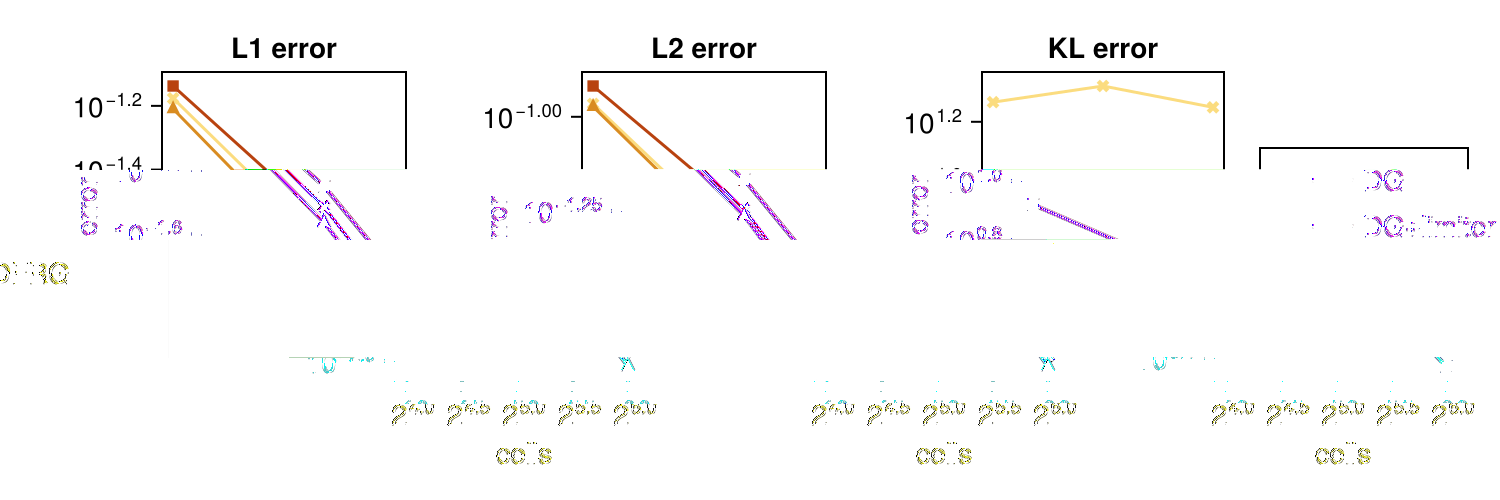

In [5]:
CairoMakie.activate!()

FRG.plot_log_error_vs_disc(     error_time_norm_method_disc[:,:,:,2:end], 
                                m_vec[2:end], 
                                methods   )

Plot error over time for a specific number of cells

In [6]:
m_idx = 3 # idx of m_vec to plot 

FRG.plot_log_errors_given_disc(     error_time_norm_method_disc,
                                    m_vec, 
                                    m_idx, 
                                    methods,
                                    time        )


Save computed error as a .csv

In [ ]:
norm_type = ["L1", "L2", "KL" ]

filename = FRG.generate_error_csv_filename(     type,
                                                d, 
                                                p, 
                                                T, 
                                                n_t, 
                                                is_exact = true    )

FRG.update_csv_with_errors(     filename, 
                                error_time_norm_method_disc, 
                                time,
                                norm_type=norm_type, 
                                methods=methods, 
                                m_vec=m_vec     );